In [134]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import pandas as pd
import sys
%matplotlib inline

In [269]:
DEBUG=False

def debug(log):
    if DEBUG:
        print(log)
        
def is_random_match(vector):
    if np.amax(vector) == 0:
        return True
    if rand.randint(0,9) == 0:
        return True
    return False

# return nonzero max value 
def argmax(vector):
    import numpy as np
    m = np.amax(vector)
    return np.nonzero(vector == m)[0]

def a_argmax(vector, s_eps, k):
    import numpy
    eps = float(s_eps)
    # 레슨#1. 앞으로 alias 따위 쓰지 않고 항상 직접 호출하자 - 원인은 한 번 호출된 alias 가 seed 결정을 하는건가?
#     p = rand.rand()
    p = numpy.random.rand()
    a = 0
    if eps == 0 and np.amax(vector) == 0:
        debug("initial method")
#         sys.stdout.write("*")
        a = rand.choice(k)
    elif p < eps:
        debug("random method")
#         sys.stdout.write("-")
        a = rand.choice(k)
    else:
        debug("greedy method")
#         sys.stdout.write("+")
        a = np.argmax(vector)
    debug("p: {}, eps: {}, a: {}".format(p, eps, a))
    return a


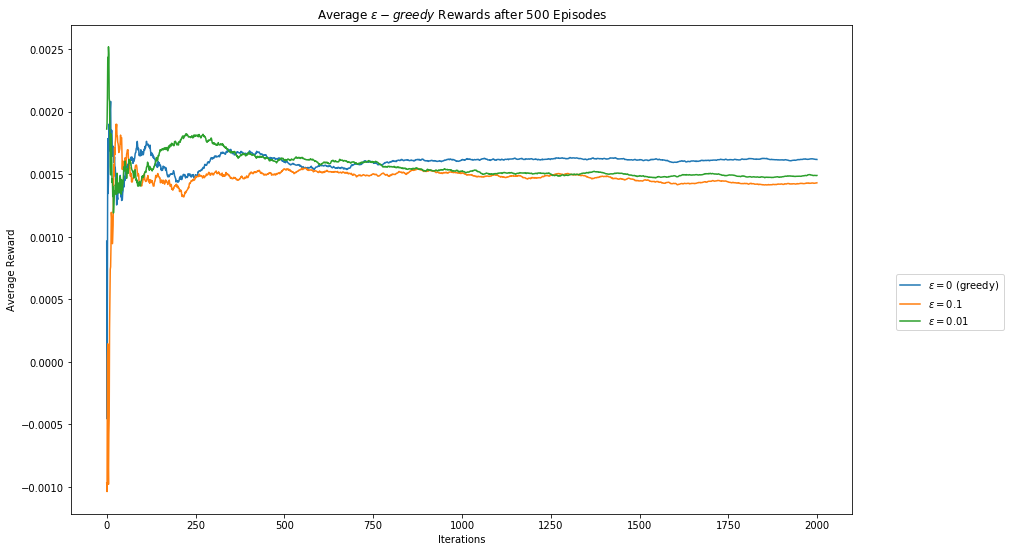

In [284]:
# global variables
g_mu = 0
g_sigma = 1
g_k = 10
g_eps = [ "0", "0.1", "0.01" ]
g_episodes = 500
g_steps = 2000
# initialize 1 to k
num_of_actions = g_k
eps_rewards = {}
Q = np.zeros(num_of_actions) # action value
N = np.zeros(num_of_actions) # step size

def bandit(q_means, action):
    mu = q_means[action]
    reward = np.random.normal(mu, 1)
    return reward

for episode in range(g_episodes):
    q_means = np.random.normal(g_mu, g_sigma, g_k)
    debug("q_means = {}".format(q_means))
    for eps in g_eps:
        eps_reward = np.zeros(g_steps)
        M = np.zeros(g_steps)
        n = 0
        mean_reward = 0
        for step in range(g_steps):
            n = n + 1
            A = a_argmax(Q, eps, g_k)
            R = bandit(q_means, A)
            N[A]= N[A] + 1 # num of reward per action
#             M[step] += (R - M[step]) / (step + 1) -- 원인을 알 수 없는 연산 결과
            mean_reward = mean_reward + (R - mean_reward) / (step + 1)
            M[step] = mean_reward
            Q[A] = Q[A] + 1/N[A] * (R - Q[A]) # update value-functions per action
            
        eps_reward = eps_reward + (M - eps_reward) / (episode + 1)
        eps_rewards[eps] = eps_reward
#     print("epsilon : {}".format(eps))
#     print(eps_rewards[eps])
#         print(np.max(Q))
plt.figure(figsize=(14,9))
plt.plot(eps_rewards["0"], label="$\epsilon=0$ (greedy)")
plt.plot(eps_rewards["0.1"], label="$\epsilon=0.1$")
plt.plot(eps_rewards["0.01"], label="$\epsilon=0.01$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(g_episodes) + " Episodes")
plt.show()

In [ ]:
import numpy.random as rand
x = rand.rand()
print(x, x<0.1, x<0.01)
print(rand.randint(0,9))
print(rand.choice(10))

In [265]:
a = np.zeros(10)
print(a)
a[0] = a[0] + (0.5 - a[0])
print(a)
a[0] = a[0] + (0.1 - a[0])
print(a)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.5  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
[ 0.1  0.   0.   0.   0.   0.   0.   0.   0.   0. ]


In [266]:
b = np.zeros(10)
print(b)
x = 0
x = x + (0.5 - x)
b[0] = x
print(b)
x = x + (0.1 - x)
b[0] = x
print(b)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.5  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
[ 0.1  0.   0.   0.   0.   0.   0.   0.   0.   0. ]


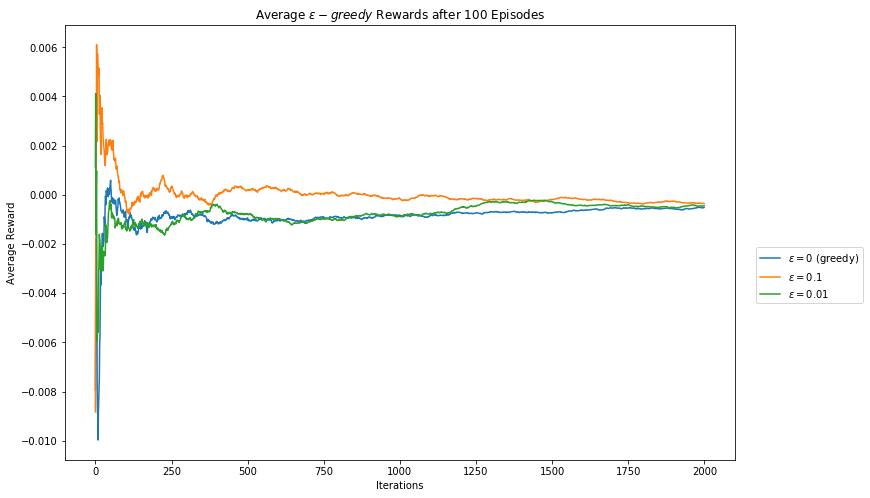

In [278]:
# global variables
g_mu = 0
g_sigma = 1
g_k = 10
g_eps = [ "0", "0.1", "0.01" ]
g_episodes = 100
g_steps = 2000
# initialize 1 to k
num_of_actions = g_k
eps_rewards = {}
k_reward = np.zeros(num_of_actions) # action value
k_n = np.zeros(num_of_actions) # step size

def bandit(q_means, action):
    mu = q_means[action]
#     reward = np.random.normal(self.mu[a], 1)
    reward = np.random.normal(mu, 1)
#     print("a: {}, r: {}, mu: {}".format(action, reward, mu))
    return reward

for episode in range(g_episodes):
    q_means = np.random.normal(g_mu, g_sigma, g_k)
    debug("q_means = {}".format(q_means))
    for eps in g_eps:
        eps_reward = np.zeros(g_steps)
        total_reward = np.zeros(g_steps)
        n = 0
        mean_reward = 0
        for step in range(g_steps):
            n = n + 1
            a = a_argmax(k_reward, eps, g_k)
            reward = bandit(q_means, a)
            k_n[a]= k_n[a] + 1 # num of reward per action
            
            mean_reward = mean_reward + (reward - mean_reward) / n
            k_reward[a] = k_reward[a] + (reward - k_reward[a]) / k_n[a]
            total_reward[step] = mean_reward
            
            debug("R: {}, M: {}, N: {}".format(reward, mean_reward, n))
            
        eps_reward = eps_reward + (total_reward - eps_reward) / (episode + 1)
        eps_rewards[eps] = eps_reward
#     print("epsilon : {}".format(eps))
#     print(eps_rewards[eps])
#         print(np.max(Q))
plt.figure(figsize=(12,8))
plt.plot(eps_rewards["0"], label="$\epsilon=0$ (greedy)")
plt.plot(eps_rewards["0.1"], label="$\epsilon=0.1$")
plt.plot(eps_rewards["0.01"], label="$\epsilon=0.01$")
plt.legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average $\epsilon-greedy$ Rewards after " + str(g_episodes) + " Episodes")
plt.show()